In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import mlflow
import pandas as pd
import ssl
from typing import Tuple, Optional

In [2]:
tf.__version__

'2.16.2'

In [3]:
import consts as c
import utils as u

In [4]:
# SSL settings
ssl._create_default_https_context = ssl._create_unverified_context

In [5]:
# MLFlow settings
mlflow.set_tracking_uri("sqlite:///mlflow.db")

In [6]:
mlflow.tensorflow.autolog()

2024/07/27 16:06:29 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


In [7]:
# Load dataset
test_set, val_set, train_set, info = u.load(c.DATASET_NAME, c.DATASET_PATH)

Finished load() in 0.2467 secs


In [7]:
# Inspecting sizes of the images
sizes = [(img.shape[0],img.shape[1]) for img, label in test_set]
df = pd.DataFrame(sizes).set_axis(['Width', 'Height'], axis='columns')

2024-07-23 22:16:35.564844: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [8]:
df.head()

,Width,Height
0,512,512
1,512,512
2,512,512
3,512,512
4,512,512


In [9]:
df.mode().iloc[0]

Width     512
Height    512
Name: 0, dtype: int64

In [10]:
df.median()

Width     512.0
Height    512.0
dtype: float64

In [11]:
df.mean()

Width     475.087010
Height    495.813782
dtype: float64

In [12]:
df.min()

Width     213
Height    287
dtype: int64

In [13]:
# We can clearly observe that 61.5% percent of the data is 512x512
unique_counts = df.value_counts().reset_index(name='Counts')
unique_counts['Percentage'] = (unique_counts['Counts'] / unique_counts['Counts'].sum()) * 100
unique_counts = unique_counts.rename(columns={0: 'Counts'})
unique_counts

,Width,Height,Counts,Percentage
0,512,512,15518,61.457426
1,384,512,3812,15.097030
2,512,384,1654,6.550495
3,512,382,708,2.803960
4,382,512,636,2.518812
...,...,...,...,...
297,376,512,1,0.003960
298,387,512,1,0.003960
299,396,512,1,0.003960
300,397,512,1,0.003960


Text(0, 0.5, 'Height')

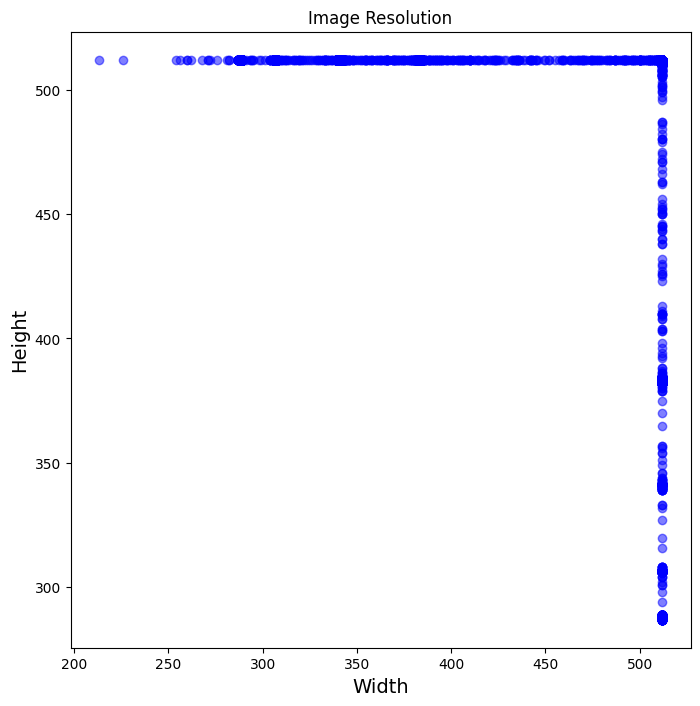

In [14]:
# Plotting sizes distribution
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
points = ax.scatter(df.Width, df.Height, color='blue', alpha=0.5, picker=True)
ax.set_title("Image Resolution")
ax.set_xlabel("Width", size=14)
ax.set_ylabel("Height", size=14)

In [15]:
# How many images in each set
print(f"Test set: {test_set.cardinality()} images")
print(f"Validation set: {val_set.cardinality()} images")
print(f"Train set: {train_set.cardinality()} images")
print(f"Total: {train_set.cardinality() + test_set.cardinality() + val_set.cardinality()} images")

Test set: 25250 images
Validation set: 11362 images
Train set: 64388 images
Total: 101000 images


In [16]:
# Exploring features and classes
features = info.features
class_names = info.features["label"].names
size = info.dataset_size

In [17]:
print(f"FEATURES: \n\n {features} \n")
print(f"----------------------------")
print(f"CLASSES: \n\n {class_names} \n")
print(f"----------------------------")
print(f"DATASET SIZE: {size} images \n")

FEATURES: 

 FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
}) 

----------------------------
CLASSES: 

 ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheesecake', 'cheese_plate', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 

In [18]:
# Exploring dataset
info.description

"This dataset consists of 101 food categories, with 101'000 images. For each class, 250 manually reviewed test images are provided as well as 750 training images. On purpose, the training images were not cleaned, and thus still contain some amount of noise. This comes mostly in the form of intense colors and sometimes wrong labels. All images were rescaled to have a maximum side length of 512 pixels."

2024-07-23 22:16:35.807340: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


{'shape': TensorShape([512, 512, 3]),
 'tensor': <tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
 array([[[170, 193, 165],
         [175, 198, 170],
         [187, 209, 186],
         ...,
         [253, 255, 249],
         [253, 255, 249],
         [253, 255, 249]],
 
        [[169, 185, 159],
         [169, 184, 161],
         [171, 189, 167],
         ...,
         [253, 255, 249],
         [253, 255, 249],
         [253, 255, 249]],
 
        [[166, 171, 151],
         [161, 166, 146],
         [158, 165, 147],
         ...,
         [253, 255, 249],
         [253, 255, 249],
         [253, 255, 249]],
 
        ...,
 
        [[143, 131, 105],
         [143, 131, 105],
         [141, 132, 103],
         ...,
         [152, 131, 104],
         [153, 129, 103],
         [151, 127, 101]],
 
        [[139, 129, 102],
         [138, 128, 101],
         [137, 128,  99],
         ...,
         [150, 126, 100],
         [151, 125, 100],
         [152, 126,  99]],
 
        [[133, 123

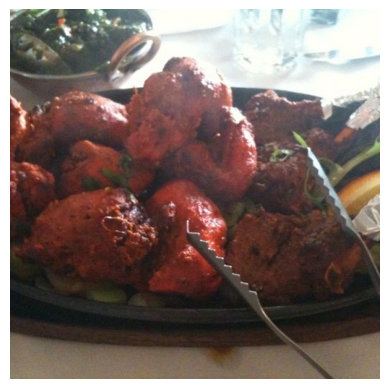

In [19]:
# Random image
u.random_sample(train_set, info)

In [20]:
# Preparing the dataset: Resizing each image, creating batches, setting up prefetch
train_set = u.prepare_dataset(train_set, img_shape=224)
val_set = u.prepare_dataset(val_set, img_shape=224)
test_set = u.prepare_dataset(test_set)

In [21]:
# Making sure the images were resized
iterator_val_set = iter(val_set)
imgs, labels = next(iterator_val_set)
imgs[127].shape

TensorShape([224, 224, 3])

In [8]:
# Creating callbacks
cpcb = u.create_checkpoint_callback(checkpoint_path=c.CHECKPOINTS_BASE_PATH, monitor="val_sparse_categorical_accuracy")
tbcb = u.create_tensorboard_callback(dir_name=c.LOGS_PATH, model_name=c.BASE_MODEL_NAME)
escb = u.create_early_stopping_callback()
aocb = u.AntiOverfittingCallback()

In [9]:
# Now we have a significant problem at hand, we decided to have all our images in 512x512 resolution.
# This is not good for ResNet50. Why? Because the ImageNet dataset that ResNet50 was trained on  
# consists of 224x224 images (almost 2x smaller). We have 2 solutions:
# 1. Lower the resolution to 224x224 and then gradually increase it at after some epochs.
# 2. Use a model that was trained on images larger or equal than 512x512.
# Since we WANT to use ResNet, we will try the first strategy.
# Plan: start with 224, then increase to 336, then to 512.

# Load the backbone first.
def resnet50(img_shape=224):
    """
    ResNet50 CNN 
    """
    base_model = tf.keras.applications.ResNet50(
        include_top=False,
        weights='imagenet',
        input_shape=(img_shape, img_shape, 3),
    )
    
    return base_model  

In [ ]:
base_model = resnet50().summary()

In [10]:
def baseline_model(
    img_shape: int, 
    backbone_trainable: bool, 
    batch_normalize_adapter: bool, 
    batch_normalize_backbone: bool,
):
    '''
    If backbone_trainable == true, then resnet50 layers will be unfrozen and trained
    If batch_normalize_* == true, the mean and variance are learned (usually during training)
    Set batch_normalize_* = false when fine-tuning or testing.
    '''
    base_model = resnet50(img_shape)
    base_model.trainable = backbone_trainable

    inl = tf.keras.Input(shape=(img_shape, img_shape, 3))
    scale_layer = tf.keras.layers.Rescaling(scale=1.0/255)
    rotate_layer = tf.keras.layers.RandomRotation(0.1)
    contrast_layer = tf.keras.layers.RandomContrast(0.2)
    
    x = scale_layer(inl)
    x = rotate_layer(x)
    x = contrast_layer(x)
    x = base_model(x, training=batch_normalize_backbone)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.BatchNormalization()(x, training=batch_normalize_adapter)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.4)(x)
    x = tf.keras.layers.BatchNormalization()(x, training=batch_normalize_adapter)
    
    outl = tf.keras.layers.Dense(101, activation='softmax')(x)
    model = tf.keras.Model(inl, outl)
    model.name = "ResNet-50"

    return model

In [27]:
mlflow.set_experiment("ResNet-50 (baseline)")

bmodel = baseline_model(
    224, 
    backbone_trainable=False,
    batch_normalize_adapter=True, 
    batch_normalize_backbone=False
)

bmodel.compile(
    optimizer=tf.keras.optimizers.Adam(), # normal learning rate during tflearning
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

history = bmodel.fit(
    train_set,
    batch_size=128,
    epochs=8,
    validation_data=val_set,
    callbacks=[cpcb, tbcb, escb, aocb] # checkpointing, tensorboard, early-stopping, custom anti-overfitting
)

testing = bmodel.evaluate(test_set)

2024/07/23 22:17:09 INFO mlflow.tracking.fluent: Experiment with name 'ResNet-50 (baseline)' does not exist. Creating a new experiment.
2024/07/23 22:17:10 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'c17162d2d1874d8db278d6a8e1596932', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
2024-07-23 22:17:26.787619: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-07-23 22:17:30.154338: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 1/8
503/503 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 4.8413 - sparse_categorical_accuracy: 0.0280
Epoch 1: val_sparse_categorical_accuracy improved from -inf to 0.05566, saving model to /tmp/ckpt/ResNet-50.keras


2024/07/23 22:41:18 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: cannot pickle 'module' object


503/503 ━━━━━━━━━━━━━━━━━━━━ 1428s 3s/step - loss: 4.8410 - sparse_categorical_accuracy: 0.0280 - val_loss: 4.3501 - val_sparse_categorical_accuracy: 0.0557
Epoch 2/8
503/503 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 4.3844 - sparse_categorical_accuracy: 0.0559
Epoch 2: val_sparse_categorical_accuracy improved from 0.05566 to 0.07937, saving model to /tmp/ckpt/ResNet-50.keras


2024/07/23 23:03:59 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: cannot pickle 'module' object


503/503 ━━━━━━━━━━━━━━━━━━━━ 1361s 3s/step - loss: 4.3844 - sparse_categorical_accuracy: 0.0559 - val_loss: 4.1831 - val_sparse_categorical_accuracy: 0.0794
Epoch 3/8
503/503 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 4.2348 - sparse_categorical_accuracy: 0.0685
Epoch 3: val_sparse_categorical_accuracy improved from 0.07937 to 0.08461, saving model to /tmp/ckpt/ResNet-50.keras


2024/07/23 23:25:47 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: cannot pickle 'module' object


503/503 ━━━━━━━━━━━━━━━━━━━━ 1309s 3s/step - loss: 4.2348 - sparse_categorical_accuracy: 0.0685 - val_loss: 4.1151 - val_sparse_categorical_accuracy: 0.0846
Epoch 4/8
503/503 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 4.1448 - sparse_categorical_accuracy: 0.0791
Epoch 4: val_sparse_categorical_accuracy improved from 0.08461 to 0.08754, saving model to /tmp/ckpt/ResNet-50.keras


2024/07/23 23:47:54 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: cannot pickle 'module' object


503/503 ━━━━━━━━━━━━━━━━━━━━ 1327s 3s/step - loss: 4.1448 - sparse_categorical_accuracy: 0.0791 - val_loss: 4.0903 - val_sparse_categorical_accuracy: 0.0875
Epoch 5/8
503/503 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 4.0946 - sparse_categorical_accuracy: 0.0863
Epoch 5: val_sparse_categorical_accuracy improved from 0.08754 to 0.09357, saving model to /tmp/ckpt/ResNet-50.keras


2024/07/24 00:11:13 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: cannot pickle 'module' object


503/503 ━━━━━━━━━━━━━━━━━━━━ 1399s 3s/step - loss: 4.0945 - sparse_categorical_accuracy: 0.0863 - val_loss: 4.0457 - val_sparse_categorical_accuracy: 0.0936
Epoch 6/8
503/503 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 4.0458 - sparse_categorical_accuracy: 0.0929
Epoch 6: val_sparse_categorical_accuracy improved from 0.09357 to 0.09597, saving model to /tmp/ckpt/ResNet-50.keras


2024/07/24 00:34:29 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: cannot pickle 'module' object


503/503 ━━━━━━━━━━━━━━━━━━━━ 1396s 3s/step - loss: 4.0458 - sparse_categorical_accuracy: 0.0929 - val_loss: 4.0207 - val_sparse_categorical_accuracy: 0.0960
Epoch 7/8
503/503 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 4.0131 - sparse_categorical_accuracy: 0.1001
Epoch 7: val_sparse_categorical_accuracy improved from 0.09597 to 0.10387, saving model to /tmp/ckpt/ResNet-50.keras


2024/07/24 00:57:22 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: cannot pickle 'module' object


503/503 ━━━━━━━━━━━━━━━━━━━━ 1373s 3s/step - loss: 4.0131 - sparse_categorical_accuracy: 0.1001 - val_loss: 3.9979 - val_sparse_categorical_accuracy: 0.1039
Epoch 8/8
503/503 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 3.9919 - sparse_categorical_accuracy: 0.0994
Epoch 8: val_sparse_categorical_accuracy improved from 0.10387 to 0.10520, saving model to /tmp/ckpt/ResNet-50.keras


2024/07/24 01:20:05 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: cannot pickle 'module' object


503/503 ━━━━━━━━━━━━━━━━━━━━ 1363s 3s/step - loss: 3.9919 - sparse_categorical_accuracy: 0.0994 - val_loss: 3.9844 - val_sparse_categorical_accuracy: 0.1052
Restoring model weights from the end of the best epoch: 8.


2024-07-24 01:20:05.952152: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step


2024/07/24 01:20:11 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/arseniikvachan/Food-Vision/.venv/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils."


197/197 ━━━━━━━━━━━━━━━━━━━━ 13953s 71s/step - loss: 40.9208 - sparse_categorical_accuracy: 0.0108


In [11]:
train_set = u.prepare_dataset(train_set, img_shape=336)
val_set = u.prepare_dataset(val_set, img_shape=336)

In [12]:
mlflow.set_tag("mlflow.runName", "336-transfer-learning")

bmodel_2 = baseline_model(
    336, 
    backbone_trainable=False, 
    batch_normalize_adapter=True, 
    batch_normalize_backbone=False
)

bmodel_2.load_weights(c.CHECKPOINTS_BASE_PATH)

bmodel_2.compile(
    optimizer=tf.keras.optimizers.Adam(), # normal learning rate during tflearning
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

history = bmodel_2.fit(
    train_set,
    batch_size=128,
    epochs=8,
    validation_data=val_set,
    callbacks=[cpcb, tbcb, escb, aocb] # checkpointing, tensorboard, early-stopping, custom anti-overfitting
)

testing = bmodel_2.evaluate(test_set)

2024-07-26 12:45:41.629442: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-07-26 12:45:47.890461: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


2024/07/26 12:45:48 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: The configured tracking uri scheme: 'sqlite' is invalid for use with the proxy mlflow-artifact scheme. The allowed tracking schemes are: {'https', 'http'}


Epoch 1/8
503/503 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - loss: 4.3062 - sparse_categorical_accuracy: 0.0594
Epoch 1: val_sparse_categorical_accuracy improved from -inf to 0.09206, saving model to /tmp/ckpt/ResNet-50.keras


2024/07/26 13:35:26 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: The configured tracking uri scheme: 'sqlite' is invalid for use with the proxy mlflow-artifact scheme. The allowed tracking schemes are: {'https', 'http'}


503/503 ━━━━━━━━━━━━━━━━━━━━ 2978s 6s/step - loss: 4.3060 - sparse_categorical_accuracy: 0.0595 - val_loss: 4.0810 - val_sparse_categorical_accuracy: 0.0921
Epoch 2/8
503/503 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - loss: 4.0804 - sparse_categorical_accuracy: 0.0880
Epoch 2: val_sparse_categorical_accuracy improved from 0.09206 to 0.09979, saving model to /tmp/ckpt/ResNet-50.keras


2024/07/26 14:24:24 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: The configured tracking uri scheme: 'sqlite' is invalid for use with the proxy mlflow-artifact scheme. The allowed tracking schemes are: {'https', 'http'}


503/503 ━━━━━━━━━━━━━━━━━━━━ 2938s 6s/step - loss: 4.0804 - sparse_categorical_accuracy: 0.0880 - val_loss: 4.0120 - val_sparse_categorical_accuracy: 0.0998
Epoch 3/8
503/503 ━━━━━━━━━━━━━━━━━━━━ 0s 35s/step - loss: 4.0022 - sparse_categorical_accuracy: 0.0987 
Epoch 3: val_sparse_categorical_accuracy improved from 0.09979 to 0.11053, saving model to /tmp/ckpt/ResNet-50.keras


2024/07/26 19:27:12 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: The configured tracking uri scheme: 'sqlite' is invalid for use with the proxy mlflow-artifact scheme. The allowed tracking schemes are: {'https', 'http'}


503/503 ━━━━━━━━━━━━━━━━━━━━ 18168s 36s/step - loss: 4.0022 - sparse_categorical_accuracy: 0.0987 - val_loss: 3.9612 - val_sparse_categorical_accuracy: 0.1105
Epoch 4/8
503/503 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - loss: 3.9664 - sparse_categorical_accuracy: 0.1030
Epoch 4: val_sparse_categorical_accuracy improved from 0.11053 to 0.11506, saving model to /tmp/ckpt/ResNet-50.keras


2024/07/26 20:16:15 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: The configured tracking uri scheme: 'sqlite' is invalid for use with the proxy mlflow-artifact scheme. The allowed tracking schemes are: {'https', 'http'}


503/503 ━━━━━━━━━━━━━━━━━━━━ 2943s 6s/step - loss: 3.9663 - sparse_categorical_accuracy: 0.1030 - val_loss: 3.9309 - val_sparse_categorical_accuracy: 0.1151
Epoch 5/8
503/503 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - loss: 3.9237 - sparse_categorical_accuracy: 0.1107
Epoch 5: val_sparse_categorical_accuracy improved from 0.11506 to 0.11958, saving model to /tmp/ckpt/ResNet-50.keras


2024/07/26 21:06:01 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: The configured tracking uri scheme: 'sqlite' is invalid for use with the proxy mlflow-artifact scheme. The allowed tracking schemes are: {'https', 'http'}


503/503 ━━━━━━━━━━━━━━━━━━━━ 2986s 6s/step - loss: 3.9238 - sparse_categorical_accuracy: 0.1107 - val_loss: 3.9089 - val_sparse_categorical_accuracy: 0.1196
Epoch 6/8
503/503 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - loss: 3.8963 - sparse_categorical_accuracy: 0.1152
Epoch 6: val_sparse_categorical_accuracy improved from 0.11958 to 0.12393, saving model to /tmp/ckpt/ResNet-50.keras


2024/07/26 21:55:52 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: The configured tracking uri scheme: 'sqlite' is invalid for use with the proxy mlflow-artifact scheme. The allowed tracking schemes are: {'https', 'http'}


503/503 ━━━━━━━━━━━━━━━━━━━━ 2991s 6s/step - loss: 3.8963 - sparse_categorical_accuracy: 0.1152 - val_loss: 3.8962 - val_sparse_categorical_accuracy: 0.1239
Epoch 7/8
503/503 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - loss: 3.8722 - sparse_categorical_accuracy: 0.1168
Epoch 7: val_sparse_categorical_accuracy improved from 0.12393 to 0.12464, saving model to /tmp/ckpt/ResNet-50.keras


2024/07/26 22:45:28 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: The configured tracking uri scheme: 'sqlite' is invalid for use with the proxy mlflow-artifact scheme. The allowed tracking schemes are: {'https', 'http'}


503/503 ━━━━━━━━━━━━━━━━━━━━ 2976s 6s/step - loss: 3.8722 - sparse_categorical_accuracy: 0.1168 - val_loss: 3.8762 - val_sparse_categorical_accuracy: 0.1246
Epoch 8/8
503/503 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - loss: 3.8533 - sparse_categorical_accuracy: 0.1207
Epoch 8: val_sparse_categorical_accuracy improved from 0.12464 to 0.12713, saving model to /tmp/ckpt/ResNet-50.keras


2024/07/26 23:35:02 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: The configured tracking uri scheme: 'sqlite' is invalid for use with the proxy mlflow-artifact scheme. The allowed tracking schemes are: {'https', 'http'}


503/503 ━━━━━━━━━━━━━━━━━━━━ 2974s 6s/step - loss: 3.8533 - sparse_categorical_accuracy: 0.1207 - val_loss: 3.8762 - val_sparse_categorical_accuracy: 0.1271
Restoring model weights from the end of the best epoch: 8.


2024-07-26 23:35:02.686147: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 880ms/step


2024/07/26 23:35:08 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/arseniikvachan/Food-Vision/.venv/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils."
2024/07/26 23:35:08 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during tensorflow autologging: The configured tracking uri scheme: 'sqlite' is invalid for use with the proxy mlflow-artifact scheme. The allowed tracking schemes are: {'https', 'http'}


197/197 ━━━━━━━━━━━━━━━━━━━━ 2265s 11s/step - loss: 66.0553 - sparse_categorical_accuracy: 0.0107


In [11]:
train_set = u.prepare_dataset(train_set, img_shape=512)
val_set = u.prepare_dataset(val_set, img_shape=512)

In [ ]:
mlflow.set_experiment("ResNet-50 (baseline)")
mlflow.set_tag("mlflow.runName", "512-transfer-learning")

bmodel_3 = baseline_model(
    512, 
    backbone_trainable=False, 
    batch_normalize_adapter=True, 
    batch_normalize_backbone=False
)

bmodel_3.load_weights(c.CHECKPOINTS_BASE_PATH)

bmodel_3.compile(
    optimizer=tf.keras.optimizers.Adam(), # normal learning rate during tflearning
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

history = bmodel_3.fit(
    train_set,
    batch_size=128,
    epochs=8,
    validation_data=val_set,
    callbacks=[cpcb, tbcb, escb, aocb] # checkpointing, tensorboard, early-stopping, custom anti-overfitting
)

testing = bmodel_3.evaluate(test_set)

2024/07/27 16:07:55 INFO mlflow.tracking.fluent: Experiment with name 'ResNet-50 (baseline)' does not exist. Creating a new experiment.
2024-07-27 16:09:30.631352: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-07-27 16:09:47.042108: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 1/8
503/503 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - loss: 4.1264 - sparse_categorical_accuracy: 0.0830 
Epoch 1: val_sparse_categorical_accuracy improved from -inf to 0.11390, saving model to /tmp/ckpt/ResNet-50.keras


2024/07/27 18:10:34 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: cannot pickle 'module' object


503/503 ━━━━━━━━━━━━━━━━━━━━ 7247s 14s/step - loss: 4.1263 - sparse_categorical_accuracy: 0.0830 - val_loss: 3.9346 - val_sparse_categorical_accuracy: 0.1139
Epoch 2/8
503/503 ━━━━━━━━━━━━━━━━━━━━ 0s 17s/step - loss: 3.9421 - sparse_categorical_accuracy: 0.1058 
Epoch 2: val_sparse_categorical_accuracy improved from 0.11390 to 0.12163, saving model to /tmp/ckpt/ResNet-50.keras


2024/07/27 20:48:41 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: cannot pickle 'module' object


503/503 ━━━━━━━━━━━━━━━━━━━━ 9486s 19s/step - loss: 3.9421 - sparse_categorical_accuracy: 0.1058 - val_loss: 3.8953 - val_sparse_categorical_accuracy: 0.1216
Epoch 3/8
503/503 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - loss: 3.8950 - sparse_categorical_accuracy: 0.1138 
Epoch 3: val_sparse_categorical_accuracy improved from 0.12163 to 0.12900, saving model to /tmp/ckpt/ResNet-50.keras


2024/07/27 23:11:55 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: cannot pickle 'module' object


503/503 ━━━━━━━━━━━━━━━━━━━━ 8594s 17s/step - loss: 3.8950 - sparse_categorical_accuracy: 0.1138 - val_loss: 3.8490 - val_sparse_categorical_accuracy: 0.1290
Epoch 4/8
503/503 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - loss: 3.8463 - sparse_categorical_accuracy: 0.1234 
Epoch 4: val_sparse_categorical_accuracy improved from 0.12900 to 0.13539, saving model to /tmp/ckpt/ResNet-50.keras


2024/07/28 01:20:32 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: cannot pickle 'module' object


503/503 ━━━━━━━━━━━━━━━━━━━━ 7717s 15s/step - loss: 3.8463 - sparse_categorical_accuracy: 0.1234 - val_loss: 3.8123 - val_sparse_categorical_accuracy: 0.1354
Epoch 5/8
 38/503 ━━━━━━━━━━━━━━━━━━━━ 1:42:33 13s/step - loss: 3.8294 - sparse_categorical_accuracy: 0.1235

In [ ]:
bmodl_4_ft = baseline_model(
    512, 
    backbone_trainable=True, 
    batch_normalize_adapter=True, 
    batch_normalize_backbone=True
)

bmodl_4_ft.load_weights(c.CHECKPOINTS_BASE_PATH)

bmodl_4_ft.compile(
    optimizer=tf.keras.optimizers.Adam(), # normal learning rate during tflearning
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

history = bmodel_4_ft.fit(
    train_set,
    batch_size=128,
    epochs=8,
    validation_data=val_set,
    callbacks=[cpcb, tbcb, escb, aocb] # checkpointing, tensorboard, early-stopping, custom anti-overfitting
)

testing = bmodel_4_ft.evaluate(test_set)